In [2]:
from packages import *
from base_time_series import *
from base_spatial import *
from misc import *

import packages; importlib.reload(packages)
import base_time_series; importlib.reload(base_time_series)
import base_spatial; importlib.reload(base_spatial)
import misc; importlib.reload(misc)

<module 'misc' from '/Users/tphillips/Atmospheric time series/misc.py'>

In [37]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5
T = xr.open_dataset(f)
T = T.sel(time=T.time.dt.month.isin([1,2,12]))

T_detr = T.groupby("time.dayofyear") - T.groupby("time.dayofyear").mean('time')

T_detr

<xarray.Dataset>
Dimensions:    (time: 6317, longitude: 45, latitude: 33)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2019-12-31
  * longitude  (longitude) float32 5.0 5.25 5.5 5.75 ... 15.25 15.5 15.75 16.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... 3.617 2.929

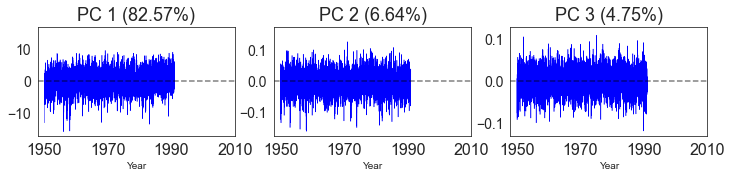

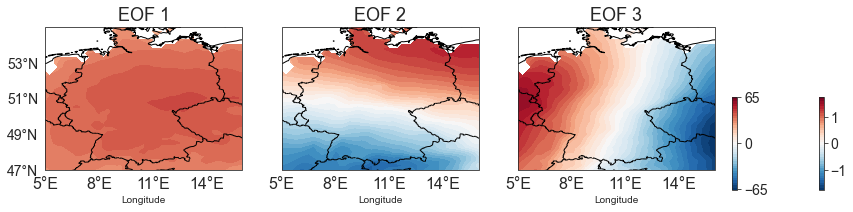

In [306]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5
pc, eof, tp_pc, tarp_pc = eof_plot(f, nam, coor, a=1, b=1.5, per=['1950-01-01', '2020-12-31']) 

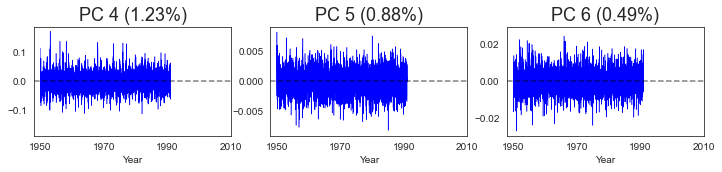

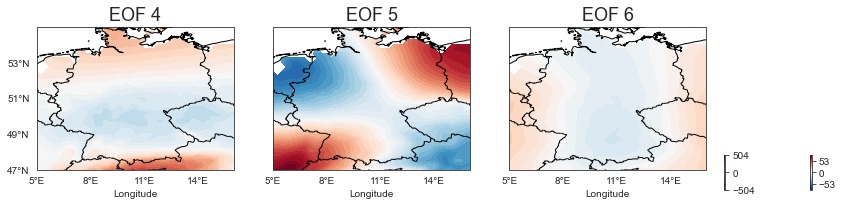

In [93]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5
pc, eof, tp_pc, tarp_pc = eof_plot(f, nam, coor, a=1, b=1.5, pcn=3, per=['1979-01-01', '2020-12-31']) 

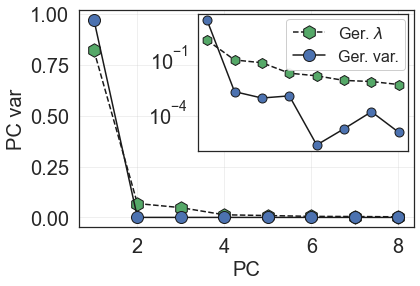

In [548]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5

cl_ge, vfr_ge, pcl_ge = eof_pcs(f, nam, coor, pcs=list(range(1,9)), 
                                per=['1950-01-01', '2022-12-31'])
plot_pc_var(vfr_ge,  sv='ger')

index: [ 0  1  3  2  6  5  7  9 15 13 14  4 11 10 17 25 19 23 12 26 18 30 24 36
 38 35 16  8 28 37 20 43 32 31 45 48 34 21 33 47 40 41 42 22 49 44 46 27
 39 29]


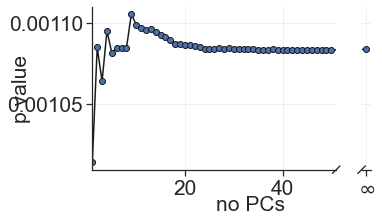

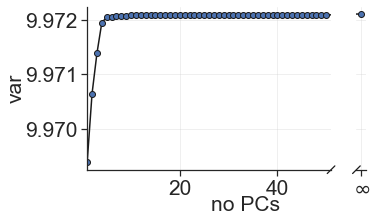

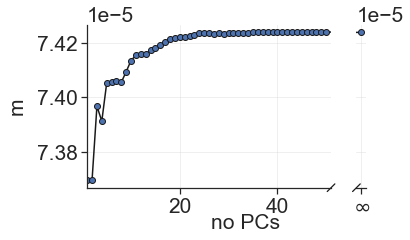

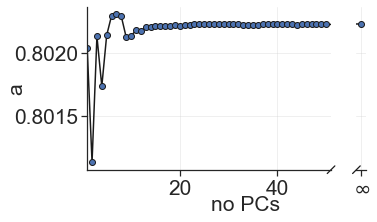

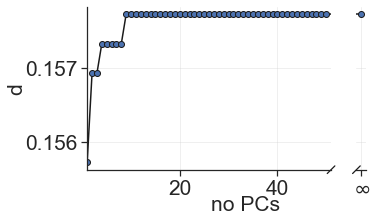

In [35]:
eofm_a, var_a, pc_a = eof_pcs(f, nam, coor, pcs=list(range(1,51)), npcs=51, 
                                 weight=True, per=['1950-01-01', '2022-12-31']) 
x_av_ant_a, ant_l_a = av_signal(f, coor, 0.25, weight=True, per=['1950-01-01', '2022-12-31']) 
dat_ant_a, pc_add_ant_a = add_pc(pc_a, var_a, eofm_a, seq='norm eig') 
  
add_pc_plot(dat_ant_a, ant_l_a, par='tpar', name='p value', sv='ger_025_w_norm_eig')                             
add_pc_plot(dat_ant_a, ant_l_a, par='var', sv='ger_025_w_norm_eig') 
add_pc_plot(dat_ant_a, ant_l_a, par='m', sv='ger_025_w_norm_eig') 
add_pc_plot(dat_ant_a, ant_l_a, par='a', sv='ger_025_w_norm_eig') 
add_pc_plot(dat_ant_a, ant_l_a, par='d', sv='ger_025_w_norm_eig') 

index: [0, 1, 2, 3, 4, 5]
d = 0.156  a = 0.802  m = 7.369726133976684e-05  p = 0.0 p ar = 0.0010141100077938336
d = 0.256  a = 0.508  m = -8.451706001721959e-10  p = 0.997 p ar = 0.998039684913351
d = 0.142  a = 0.528  m = -5.4746336791781406e-08  p = 0.404 p ar = 0.6013521768504924
d = 0.26  a = 0.339  m = 2.712900399405703e-07  p = 0.165 p ar = 0.26242183277953623
1+2 d = 0.157  a = 0.801  m = 7.369642082259089e-05  p = 0.0 p ar = 0.0010850099691557258
1+2+3 d = 0.157  a = 0.801  m = 7.364167414053185e-05  p = 0.0 p ar = 0.0010904606041062248
av. 7.399537278169756e-05 0.1577315463092619 1.0658141036401503e-13 0.0011076501624329715
spring
index: [0, 1, 2, 3, 4, 5]
d = 0.235  a = 0.746  m = 0.00031701625995883553  p = 0.002 p ar = 0.09066225605569667
d = 0.317  a = 0.464  m = 6.675876476810546e-07  p = 0.596 p ar = 0.6761026521544533
d = 0.131  a = 0.576  m = -4.049865169851418e-07  p = 0.493 p ar = 0.686919153897291
d = 0.146  a = 0.42  m = 1.919103613138064e-06  p = 0.0 p ar = 0.0010

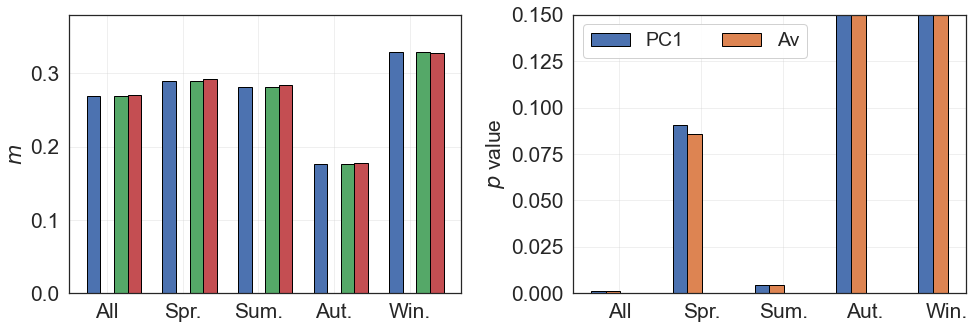

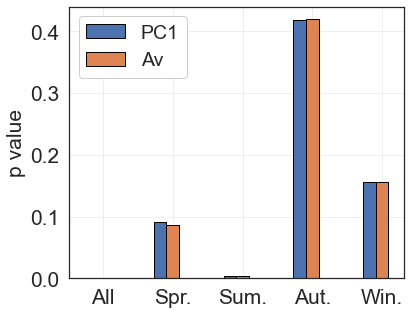

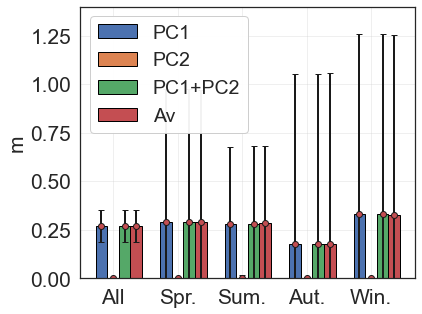

In [579]:
f = '/Users/tphillips/Atmospheric time series/big/T_daymean_ecmwf_50to2020.nc'
nam, coor, step = 'germany', [55, 5, 47, 16], 0.5

df_g = print_pc_seas(f, nam, coor, step=step, per=['1950-01-01', '2022-12-31'])
df_g['m2'] = np.where(df_g['s'] != 'whole',  df_g['m']/4, df_g['m'])
df_g['sdtr2'] = np.where(df_g['s'] != 'whole',  df_g['sdtr']/4, df_g['sdtr'])

bar_plot(df_g, sv='step05_ger_1950_2020', ax1l=[0,0.38], ax2l=0.15, lloc='upper left', alpha=0.9, npc=1) 
p_bar_plot(df_g, s=21, sv='step05_ger_1950_2020', lloc='upper left') 
m_bar_plot(df_g, s=21, sv='step05_ger_1950_2020', bar=True, up=1.4, lloc='upper left') 

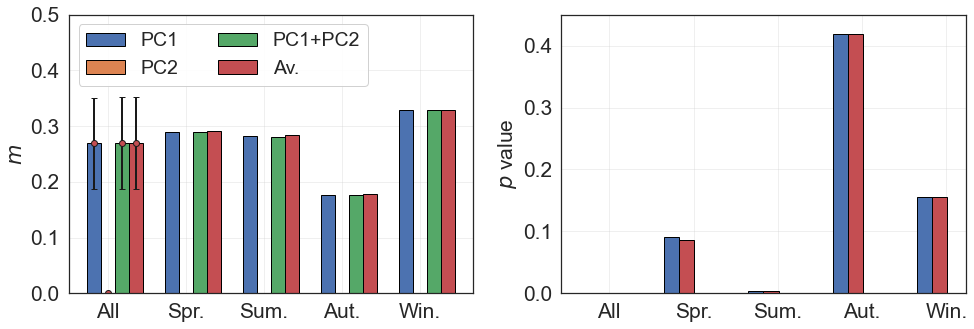

In [642]:
bar_plot(df_g, sv='step05_ger_1950_2020_small', ax1l=[0,0.5], ax2l=0.45, lloc='upper left', alpha=0.9, npc=1, dpi=100) 

### Antarctica

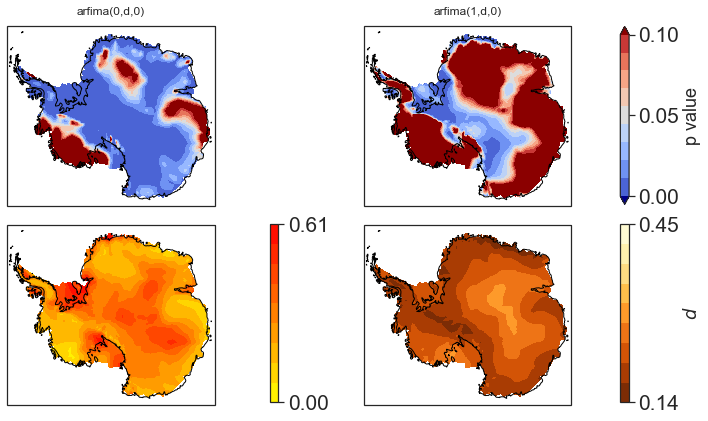

In [54]:
dat = pd.read_csv('/Users/tphillips/Atmospheric time series/ecmwf/antarc_land/coor_1side_antarc_land_1.csv', sep='\t', index_col=0)
#dat = new_var(dat)

nam, coor, step = 'antarc', [-65, -180, -90, 180], 1
plim, trlim, dlim, con = [0,0.1], [0,0.61], [0.14,0.45], 10

pol_coord_grid(dat, nam, coor, step, plim, trlim, dlim, con, a=1)

,m,d,a,var,tp_mc,tpar_mc,tp,tpar,vtr,vtrar
0,0.000076,0.245491,0.871629,4.758916,NaN,NaN,5.503500e-08,0.011145,1.965950e-10,9.022517e-10


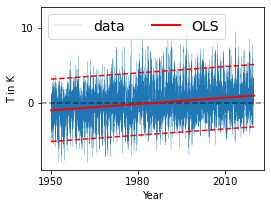

In [30]:
# averaged signal 

f = '/Users/tphillips/Atmospheric time series/big/T_antarctic_land_1_day_ecmwf_50to2020.nc'
nam, coor = 'antarc', [-67, -180, -90, 180]

#nam, coor, step = 'arc_sea_1', [90, -50, 65, 0], 1
#f = '/Users/iwanphillips/T_' + nam + '_day_ecmwf_50to2020.nc'
x_av_arc, arc_l = av_signal(f, coor, step)

plot_trend(x_av_arc)

arc_l

d = 0.44  a = 0.742  m = 1.5513111694953737e-05  p = 0.402 p ar = 0.4155394259109042
d = 0.18  a = 0.811  m = 1.699507632787742e-05  p = 0.006 p ar = 0.12976581302314416
d = 0.177  a = 0.858  m = -5.740174466861703e-07  p = 0.412 p ar = 0.46391662886899376
d = 0.082  a = 0.798  m = -9.578535963279754e-07  p = 0.072 p ar = 0.2873981177108007
d = 0.229  a = 0.768  m = 1.6814015489998127e-06  p = 0.26 p ar = 0.36524310551460437
d = 0.078  a = 0.837  m = 5.4096931046965224e-06  p = 0.0 p ar = 0.11730970142748054


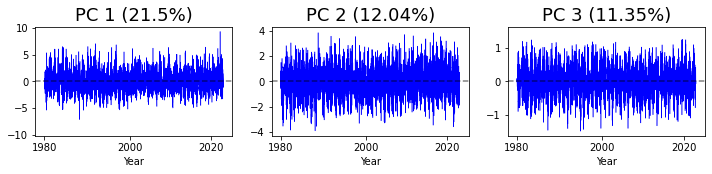

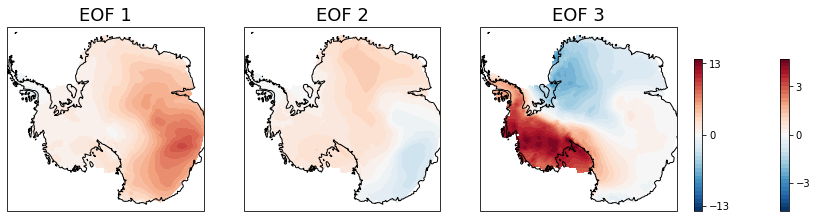

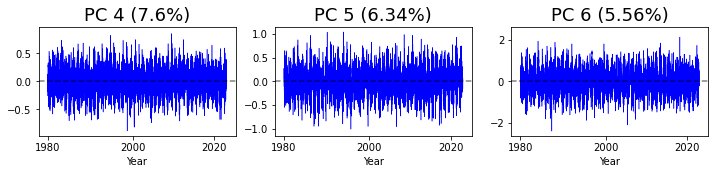

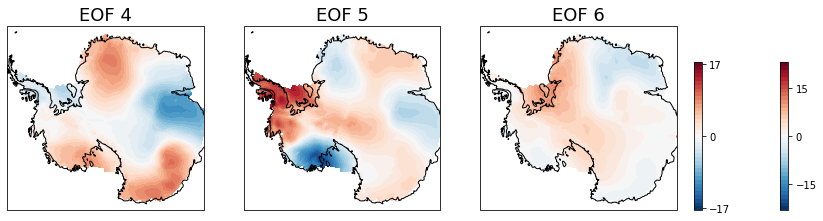

In [65]:
f = '/Users/tphillips/Atmospheric time series/big/T_antarctic_land_1_day_ecmwf_50to2022_2.nc'
nam, coor = 'antarc', [-67, -180, -90, 180]
pc, eof, tp_pc, tarp_pc = eof_plot(f, nam, coor, a=1, b=1.5, proj='polar', per=per, st='79') 

d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[0], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[0], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)
d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[1], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[1], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)
d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[2], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[2], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)

pc, eof, tp_pc, tarp_pc = eof_plot(f, nam, coor, a=1, b=1.5, proj='polar', per=per, pcn=3, st='79') 

d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[0], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[0], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)
d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[1], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[1], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)
d, a, r_trend, vpc, tp_, vtr, d_err = p_val(pc[2], ar=0, an=True)
d, a, r_trend, vpc, tp_ar, vtr, d_err = p_val(pc[2], ar=1, an=True)
print("d =", round(d, 3), " a =", round(a, 3), " m =", r_trend, " p =", round(tp_, 3), "p ar =", tp_ar)

### Arctic

complicated case due to longitudinal sign change


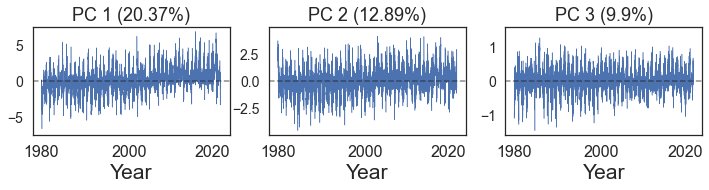

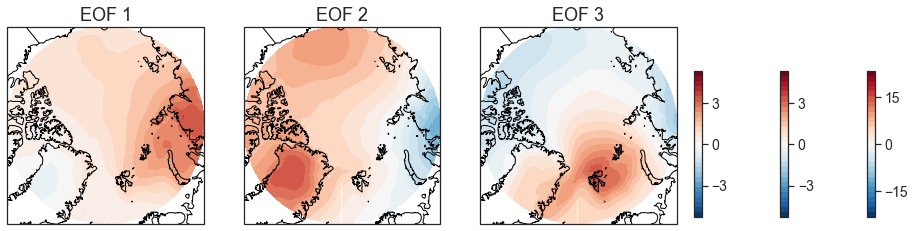

In [392]:
f = '/Users/tphillips/Atmospheric time series/ecmwf/world_sea_1/T_world_sea_1_day_ecmwf_50to2021.nc' 
nam, coor, step = 'arctic', [90, -180, 71, 180], 1  
per = ['1979-01-01', '2022-12-31'] 

pc, eof, tp_pc, tarp_pc = eof_plot(f, nam, coor, a=1, b=1.5, proj='polar', sh='ind', cen=90, per=per, st='79') 